In [4]:
df <- read.csv("~/Downloads/diabetic_data.csv")

In [5]:
head(df)
print(dim(df))

encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,⋯,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,⋯,No,No,No,No,No,No,No,No,No,NO
149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,⋯,No,Up,No,No,No,No,No,Ch,Yes,>30
64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,⋯,No,No,No,No,No,No,No,No,Yes,NO
500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,⋯,No,Up,No,No,No,No,No,Ch,Yes,NO
16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,⋯,No,Steady,No,No,No,No,No,Ch,Yes,NO
35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,⋯,No,Steady,No,No,No,No,No,No,Yes,>30


[1] 101766     50


In [6]:
data <- data.frame(df$patient_nbr,df$race,df$gender,df$age,df$admission_source_id,df$discharge_disposition_id,
                   df$time_in_hospital,df$medical_specialty,df$A1Cresult,df$change,df$diag_1,df$readmitted)

In [7]:
library (data.table)

In [8]:
setnames(data, old = c('df.patient_nbr','df.race','df.gender','df.age','df.admission_source_id',
                       'df.discharge_disposition_id','df.time_in_hospital','df.medical_specialty',
                       'df.A1Cresult','df.change','df.diag_1','df.readmitted'),
         
         new = c('p_id','race','gender','age','admission.id',
                 'discharge','time','med.specialty','HbA1Cresult','change','primary.diag','readmit'))

In [9]:
head(data)
print(dim(data))

p_id,race,gender,age,admission.id,discharge,time,med.specialty,HbA1Cresult,change,primary.diag,readmit
8222157,Caucasian,Female,[0-10),1,25,1,Pediatrics-Endocrinology,None,No,250.83,NO
55629189,Caucasian,Female,[10-20),7,1,3,?,None,Ch,276,>30
86047875,AfricanAmerican,Female,[20-30),7,1,2,?,None,No,648,NO
82442376,Caucasian,Male,[30-40),7,1,2,?,None,Ch,8,NO
42519267,Caucasian,Male,[40-50),7,1,1,?,None,Ch,197,NO
82637451,Caucasian,Male,[50-60),2,1,3,?,None,No,414,>30


[1] 101766     12


In [10]:
library(dplyr)

data <- distinct(data,p_id, .keep_all= TRUE)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:data.table’:

    between, first, last

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [11]:
print(dim(data))

[1] 71518    12


In [12]:
head(data)

p_id,race,gender,age,admission.id,discharge,time,med.specialty,HbA1Cresult,change,primary.diag,readmit
8222157,Caucasian,Female,[0-10),1,25,1,Pediatrics-Endocrinology,None,No,250.83,NO
55629189,Caucasian,Female,[10-20),7,1,3,?,None,Ch,276,>30
86047875,AfricanAmerican,Female,[20-30),7,1,2,?,None,No,648,NO
82442376,Caucasian,Male,[30-40),7,1,2,?,None,Ch,8,NO
42519267,Caucasian,Male,[40-50),7,1,1,?,None,Ch,197,NO
82637451,Caucasian,Male,[50-60),2,1,3,?,None,No,414,>30


In [13]:
table(data$discharge)


    1     2     3     4     5     6     7     8     9    10    11    12    13 
44317  1539  8784   541   913  8289   409    73     9     6  1077     2   243 
   14    15    16    17    18    19    20    22    23    24    25    27    28 
  218    40     3     8  2474     6     1  1410   260    25   778     3    90 

In [14]:
#install.packages('sqldf')

In [15]:
require(sqldf)
data <- sqldf('SELECT *
   FROM data
   WHERE discharge != 11 and discharge != 13 and discharge !=14 and discharge != 19 and discharge != 20')

Loading required package: sqldf
Loading required package: gsubfn
Loading required package: proto
Loading required package: RSQLite


In [16]:
head(data)
print(dim(data))
str(data)

p_id,race,gender,age,admission.id,discharge,time,med.specialty,HbA1Cresult,change,primary.diag,readmit
8222157,Caucasian,Female,[0-10),1,25,1,Pediatrics-Endocrinology,None,No,250.83,NO
55629189,Caucasian,Female,[10-20),7,1,3,?,None,Ch,276,>30
86047875,AfricanAmerican,Female,[20-30),7,1,2,?,None,No,648,NO
82442376,Caucasian,Male,[30-40),7,1,2,?,None,Ch,8,NO
42519267,Caucasian,Male,[40-50),7,1,1,?,None,Ch,197,NO
82637451,Caucasian,Male,[50-60),2,1,3,?,None,No,414,>30


[1] 69973    12
'data.frame':	69973 obs. of  12 variables:
 $ p_id         : int  8222157 55629189 86047875 82442376 42519267 82637451 84259809 114882984 48330783 63555939 ...
 $ race         : Factor w/ 6 levels "?","AfricanAmerican",..: 4 4 2 4 4 4 4 4 4 4 ...
 $ gender       : Factor w/ 3 levels "Female","Male",..: 1 1 1 2 2 2 2 2 1 1 ...
 $ age          : Factor w/ 10 levels "[0-10)","[10-20)",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ admission.id : int  1 7 7 7 7 2 2 7 4 4 ...
 $ discharge    : int  25 1 1 1 1 1 1 1 1 3 ...
 $ time         : int  1 3 2 2 1 3 4 5 13 12 ...
 $ med.specialty: Factor w/ 73 levels "?","AllergyandImmunology",..: 39 1 1 1 1 1 1 1 1 20 ...
 $ HbA1Cresult  : Factor w/ 4 levels ">7",">8","None",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ change       : Factor w/ 2 levels "Ch","No": 2 1 2 1 1 2 1 2 1 1 ...
 $ primary.diag : Factor w/ 717 levels "?","10","11",..: 126 145 456 556 56 265 265 278 254 284 ...
 $ readmit      : Factor w/ 3 levels "<30",">30","NO": 3 2 3 3 3 2 3 2 3 3 ..

In [17]:
table(data$race)


              ? AfricanAmerican           Asian       Caucasian        Hispanic 
           1918           12625             488           52292            1500 
          Other 
           1150 

In [18]:
library(dplyr)

data <- mutate(data,race = ifelse(race == '?','Missing',
                                         ifelse(race == 'AfricanAmerican','African American',
                                               ifelse(race == 'Caucasian','Caucasian',
                                                     ifelse(race == 'Hispanic','Other',
                                                           ifelse(race == 'Asian','Other',
                                                                 ifelse(race == 'Other','Other','Other')))))))

In [19]:
table(data$race)


African American        Caucasian          Missing            Other 
           12625            52292             1918             3138 

In [20]:
table(data$age)


  [0-10)  [10-20)  [20-30)  [30-40)  [40-50)  [50-60)  [60-70)  [70-80) 
     153      534     1121     2692     6828    12349    15684    17750 
 [80-90) [90-100) 
   11102     1760 

In [21]:
data <- mutate(data,age = ifelse(age == '[0-10)','<30',
                                         ifelse(age == '[10-20)','<30',
                                               ifelse(age == '[20-30)','<30',
                                                     ifelse(age == '[30-40)','30-60',
                                                           ifelse(age == '[40-50)','30-60',
                                                                 ifelse(age == '[50-60)','30-60','>60')))))))

In [22]:
table(data$age)


  <30   >60 30-60 
 1808 46296 21869 

In [23]:
table(data$gender)


         Female            Male Unknown/Invalid 
          37229           32741               3 

In [24]:
data <- mutate(data,gender = ifelse(gender =='Unknown/Invalid','Female',
                                           ifelse (gender == 'Female','Female',
                                                  ifelse(gender == 'Male','Male','Male'))))

In [25]:
table(data$gender)


Female   Male 
 37232  32741 

In [26]:
table(data$admission.id)


    1     2     3     4     5     6     7     8     9    10    11    13    14 
21746   908   136  2530   512  1785 37260    11    95     7     1     1     2 
   17    20    22    25 
 4820   153     4     2 

In [27]:
data <- mutate(data,admission.id = ifelse(admission.id == 7,'Emergency room',
                                                 ifelse(admission.id == 1,'physician/clinical referral',
                                                       ifelse(admission.id == 2,'physician/clinical referral',
                                                              ifelse(admission.id == 3,'physician/clinical referral',
                                                                     'Otherwise')))))

In [28]:
table(data$admission.id)


             Emergency room                   Otherwise 
                      37260                        9923 
physician/clinical referral 
                      22790 

In [29]:
table(data$discharge)


    1     2     3     4     5     6     7     8     9    10    12    15    16 
44317  1539  8784   541   913  8289   409    73     9     6     2    40     3 
   17    18    22    23    24    25    27    28 
    8  2474  1410   260    25   778     3    90 

In [30]:
data <- mutate(data,discharge = ifelse(discharge == 1,'home','Otherwise'))

In [31]:
table(data$discharge)


     home Otherwise 
    44317     25656 

In [32]:
table(data$med.specialty)


                                   ?                 AllergyandImmunology 
                               33639                                    6 
                      Anesthesiology             Anesthesiology-Pediatric 
                                   7                                   13 
                          Cardiology                 Cardiology-Pediatric 
                                4207                                    7 
                             DCPTEAM                            Dentistry 
                                   4                                    4 
                         Dermatology                     Emergency/Trauma 
                                   1                                 4393 
                       Endocrinology             Endocrinology-Metabolism 
                                  97                                    7 
              Family/GeneralPractice                     Gastroenterology 
                        

In [33]:
data <- mutate(data,med.specialty = ifelse(grepl('^Intern',data$med.specialty),'InternalMedicine',
                                          ifelse(grepl('^Cardio',data$med.specialty),'Cardiology',
                                                ifelse(grepl('^Surgery',data$med.specialty),'Surgery',
                                                      ifelse(grepl('^Family',data$med.specialty),
                                                             'Family/general practice',
                                                            ifelse(med.specialty == '?','Missing','Other'))))))

In [34]:
table(data$med.specialty)


             Cardiology Family/general practice        InternalMedicine 
                   4214                    4978                   10641 
                Missing                   Other                 Surgery 
                  33639                   12816                    3685 

In [35]:
table(data$readmit)


  <30   >30    NO 
 6277 22222 41474 

In [36]:
data <- mutate(data,readmit = ifelse(readmit == '<30','readmitted','otherwise'))

In [37]:
table(data$readmit)


 otherwise readmitted 
     63696       6277 

In [38]:
table(data$HbA1Cresult)


   >7    >8  None  Norm 
 2865  6239 57128  3741 

In [39]:
table(data$change)


   Ch    No 
31491 38482 

In [40]:
data <- mutate(data,HbA1Cresult = ifelse(HbA1Cresult == 'None','No Test',
                                        ifelse(HbA1Cresult =='>8' & change == 'Ch','Result high and med changed',
                                              ifelse(HbA1Cresult =='>8' & change =='No',
                                                     'result high but med not changed',
                                                    'Normal'))))

In [41]:
table(data$HbA1Cresult)


                        No Test                          Normal 
                          57128                            6606 
    Result high and med changed result high but med not changed 
                           4058                            2181 

In [42]:
table(data$primary.diag)


     ?     10     11    110    112    114    115    117    131    133    135 
    10      1      8      2     45      1      2      7      1      1     18 
   136    141    142    143    145    146    147    148    149    150    151 
     4      5      4      1      1      2      2      1      2     23     43 
   152    153    154    155    156    157    158    160    161    162    163 
     9    250     76     33     12     76      8      1     10    265      6 
   164    170    171    172    173    174    175    179    180    182    183 
     2      2      9      3      2    123      4      3      6    100     24 
   184    185    187    188    189    191    192    193    194    195    196 
    10    155      2     80     95     34      3     23      2      2     20 
   197    198    199    200    201    202    203    204    205    207    208 
   179    148     11     11      5     74     23     15     19      1      2 
   210    211    212    214    215    216    217    218    219 

In [43]:
data <- mutate(data,primary.diag = ifelse(grepl('^39|^40|^41|^42|^43|^44|^45|^785'
                                            ,data$primary.diag),
                                          'Circulatory system',
                                        
                                          ifelse(grepl('^250',data$primary.diag),'Diabetes',
                                            
                                            ifelse(grepl('^46|^47|^48|^49|^50|^51|^786'
                                                ,data$primary.diag),
                                                'Respiratory system',
                                                            
                                                ifelse(grepl('^52|^53|^54|^55|^56|^57|^787',
                                                        data$primary.diag),
                                                       'digestive system',
                                                      
                                                       ifelse(grepl('^80|^81|^82|^83|^84|^85|^86|^87|^88|
                                                                ^89|^90|^91|^92|^93|^94|^95|^96|^97|^98|
                                                                ^99',data$primary.diag),
                                                              'Injury and poisoning',
                                                           
                                                              ifelse(grepl('^71|^72|^73',data$primary.diag),
                                                                    'musculoskeletal and connective issue',
                                                                        
                                                                     ifelse(grepl('^58|^59|^60|^61|^62',
                                                                        data$primary.diag),'genitourinary system',
                                                                            
                                                                        ifelse(grepl('^14|^15|^16|^17|^18|^19|
                                                                                     ^20|^21|^22|^23',
                                                                                     data$primary.diag),
                                                                               'Neoplasms','Other')))))))))


In [44]:
head(data$primary.diag)

[1] "Diabetes"           "Other"              "Other"             
[4] "Other"              "Neoplasms"          "Circulatory system"

In [45]:
table(data$primary.diag)


                  Circulatory system                             Diabetes 
                               21420                                 5748 
                    digestive system                 genitourinary system 
                                6543                                 3415 
                Injury and poisoning musculoskeletal and connective issue 
                                2796                                 4064 
                           Neoplasms                                Other 
                                2388                                14083 
                  Respiratory system 
                                9516 

In [46]:
data$p_id <- NULL
data$change <- NULL

In [47]:
data <- mutate(data,readmit = ifelse(readmit =='otherwise',0,1))

In [48]:
data$race <- as.factor(data$race)
data$gender <- as.factor(data$gender)
data$age <- as.factor(data$age)
data$admission.id <- as.factor(data$admission.id)
data$discharge <- as.factor(data$discharge)

In [49]:
data$med.specialty <- as.factor(data$med.specialty)
data$HbA1Cresult <- as.factor(data$HbA1Cresult)
data$primary.diag <- as.factor(data$primary.diag)

In [50]:
str(data)

'data.frame':	69973 obs. of  10 variables:
 $ race         : Factor w/ 4 levels "African American",..: 2 2 1 2 2 2 2 2 2 2 ...
 $ gender       : Factor w/ 2 levels "Female","Male": 1 1 1 2 2 2 2 2 1 1 ...
 $ age          : Factor w/ 3 levels "<30",">60","30-60": 1 1 1 3 3 3 2 2 2 2 ...
 $ admission.id : Factor w/ 3 levels "Emergency room",..: 3 1 1 1 1 3 3 1 2 2 ...
 $ discharge    : Factor w/ 2 levels "home","Otherwise": 2 1 1 1 1 1 1 1 1 2 ...
 $ time         : int  1 3 2 2 1 3 4 5 13 12 ...
 $ med.specialty: Factor w/ 6 levels "Cardiology","Family/general practice",..: 5 4 4 4 4 4 4 4 4 3 ...
 $ HbA1Cresult  : Factor w/ 4 levels "No Test","Normal",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ primary.diag : Factor w/ 9 levels "Circulatory system",..: 2 8 8 8 7 1 1 1 1 1 ...
 $ readmit      : num  0 0 0 0 0 0 0 0 0 0 ...


In [51]:
head(data)

race,gender,age,admission.id,discharge,time,med.specialty,HbA1Cresult,primary.diag,readmit
Caucasian,Female,<30,physician/clinical referral,Otherwise,1,Other,No Test,Diabetes,0
Caucasian,Female,<30,Emergency room,home,3,Missing,No Test,Other,0
African American,Female,<30,Emergency room,home,2,Missing,No Test,Other,0
Caucasian,Male,30-60,Emergency room,home,2,Missing,No Test,Other,0
Caucasian,Male,30-60,Emergency room,home,1,Missing,No Test,Neoplasms,0
Caucasian,Male,30-60,physician/clinical referral,home,3,Missing,No Test,Circulatory system,0


In [52]:
str(data)

'data.frame':	69973 obs. of  10 variables:
 $ race         : Factor w/ 4 levels "African American",..: 2 2 1 2 2 2 2 2 2 2 ...
 $ gender       : Factor w/ 2 levels "Female","Male": 1 1 1 2 2 2 2 2 1 1 ...
 $ age          : Factor w/ 3 levels "<30",">60","30-60": 1 1 1 3 3 3 2 2 2 2 ...
 $ admission.id : Factor w/ 3 levels "Emergency room",..: 3 1 1 1 1 3 3 1 2 2 ...
 $ discharge    : Factor w/ 2 levels "home","Otherwise": 2 1 1 1 1 1 1 1 1 2 ...
 $ time         : int  1 3 2 2 1 3 4 5 13 12 ...
 $ med.specialty: Factor w/ 6 levels "Cardiology","Family/general practice",..: 5 4 4 4 4 4 4 4 4 3 ...
 $ HbA1Cresult  : Factor w/ 4 levels "No Test","Normal",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ primary.diag : Factor w/ 9 levels "Circulatory system",..: 2 8 8 8 7 1 1 1 1 1 ...
 $ readmit      : num  0 0 0 0 0 0 0 0 0 0 ...


In [53]:
# Create Training and Test data -
set.seed(100)  # setting seed to reproduce results of random sampling
trainingRowIndex <- sample(1:nrow(data), 0.8*nrow(data))  # row indices for training data
trainingData <- data[trainingRowIndex, ]  # model training data
testData  <- data[-trainingRowIndex, ]   # test data

dim(trainingData)
dim(testData )

[1] 55978    10

[1] 13995    10


    0     1 
50958  5020 

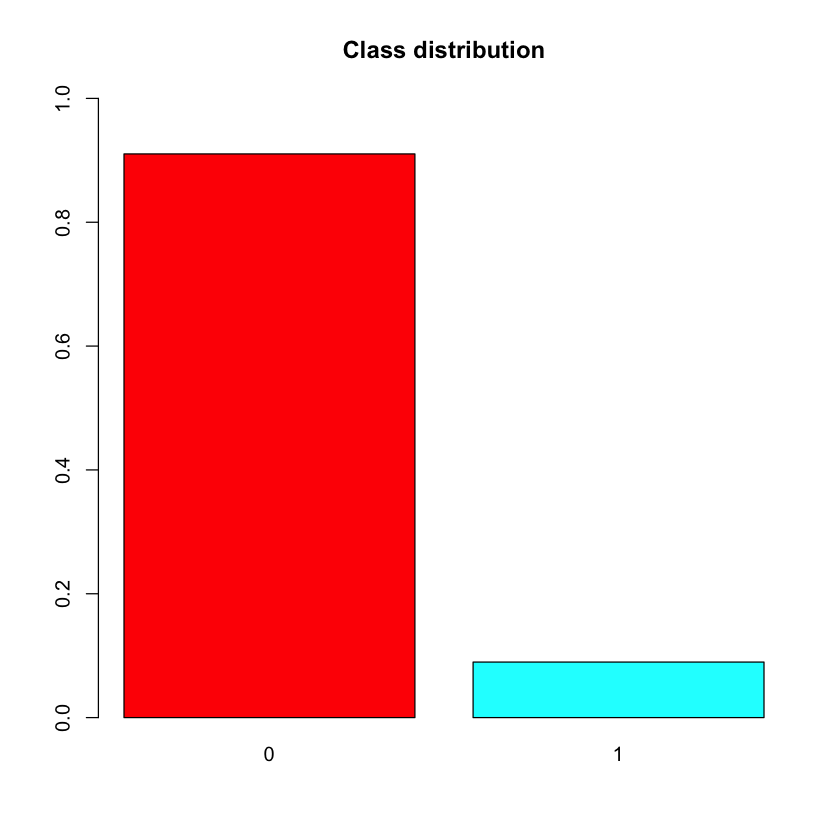

In [54]:
table(trainingData$readmit)
barplot(prop.table(table(trainingData$readmit)),
       col = rainbow(2),
       ylim = c(0,1),
       main = 'Class distribution')

In [55]:
#install.packages('DMwR')
#install.packages('ROSE')

In [56]:
#simulating data
library(ROSE)
bal_data <- ROSE(readmit ~ ., data = trainingData,N = 70000, seed = 111)$data

Loaded ROSE 0.0-3



In [57]:
table(bal_data$gender)
prop.table(table (bal_data$readmit))


Female   Male 
 37557  32443 


        0         1 
0.5009286 0.4990714 

In [58]:
head(bal_data)
dim(bal_data)
str(bal_data)

race,gender,age,admission.id,discharge,time,med.specialty,HbA1Cresult,primary.diag,readmit
Missing,Male,>60,Emergency room,Otherwise,6.473044,Missing,Normal,digestive system,0
Caucasian,Male,30-60,Otherwise,home,4.814880,Cardiology,No Test,Circulatory system,0
African American,Female,<30,Emergency room,home,5.579572,Missing,No Test,Diabetes,0
African American,Female,30-60,Emergency room,Otherwise,1.086865,Missing,No Test,Injury and poisoning,0
Caucasian,Female,>60,Emergency room,home,9.724580,Other,No Test,Other,0
Caucasian,Male,>60,physician/clinical referral,Otherwise,3.211601,Missing,No Test,musculoskeletal and connective issue,0


[1] 70000    10

'data.frame':	70000 obs. of  10 variables:
 $ race         : Factor w/ 4 levels "African American",..: 3 2 1 1 2 2 2 2 1 2 ...
 $ gender       : Factor w/ 2 levels "Female","Male": 2 2 1 1 1 2 1 1 2 1 ...
 $ age          : Factor w/ 3 levels "<30",">60","30-60": 2 3 1 3 2 2 2 3 3 2 ...
 $ admission.id : Factor w/ 3 levels "Emergency room",..: 1 2 1 1 1 3 1 2 1 3 ...
 $ discharge    : Factor w/ 2 levels "home","Otherwise": 2 1 1 2 1 2 2 1 2 2 ...
 $ time         : num  6.47 4.81 5.58 1.09 9.72 ...
 $ med.specialty: Factor w/ 6 levels "Cardiology","Family/general practice",..: 4 1 4 4 5 4 4 4 4 4 ...
 $ HbA1Cresult  : Factor w/ 4 levels "No Test","Normal",..: 2 1 1 1 1 1 1 1 1 1 ...
 $ primary.diag : Factor w/ 9 levels "Circulatory system",..: 3 1 2 5 8 6 9 1 9 9 ...
 $ readmit      : num  0 0 0 0 0 0 0 0 0 0 ...


In [59]:
logitMod <- glm(readmit ~., 
                data=bal_data, 
                family=binomial(link="logit"))

In [60]:
# #install.packages('gridExtra')
# library(gridExtra)
# a <- summary(logitMod)
# pdf('summary.pdf',a,height = 11,width = 8.5)
# dev.off()

In [61]:
sink('summary.txt')
summary(logitMod)
sink()


Call:
glm(formula = readmit ~ ., family = binomial(link = "logit"), 
    data = bal_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5996  -1.1171  -0.8321   1.1532   1.6405  

Coefficients:
                                                  Estimate Std. Error z value
(Intercept)                                      -0.618849   0.067201  -9.209
raceCaucasian                                    -0.002521   0.020758  -0.121
raceMissing                                      -0.224159   0.052320  -4.284
raceOther                                        -0.026406   0.041462  -0.637
genderMale                                        0.041922   0.015618   2.684
age>60                                            0.267550   0.055454   4.825
age30-60                                          0.073318   0.055499   1.321
admission.idOtherwise                            -0.113744   0.023679  -4.804
admission.idphysician/clinical referral           0.009105   0.018518   0.492


In [62]:
print(summary(logitMod))


Call:
glm(formula = readmit ~ ., family = binomial(link = "logit"), 
    data = bal_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5996  -1.1171  -0.8321   1.1532   1.6405  

Coefficients:
                                                  Estimate Std. Error z value
(Intercept)                                      -0.618849   0.067201  -9.209
raceCaucasian                                    -0.002521   0.020758  -0.121
raceMissing                                      -0.224159   0.052320  -4.284
raceOther                                        -0.026406   0.041462  -0.637
genderMale                                        0.041922   0.015618   2.684
age>60                                            0.267550   0.055454   4.825
age30-60                                          0.073318   0.055499   1.321
admission.idOtherwise                            -0.113744   0.023679  -4.804
admission.idphysician/clinical referral           0.009105   0.018518   0.492


In [63]:
predicted <- predict(logitMod, testData, type="response")
head(predicted)

4         5         8        13        15        20 
0.4085308 0.3865249 0.5064584 0.6179487 0.3976316 0.5277648

In [64]:
table(testData$readmit)


    0     1 
12738  1257 

In [65]:
table(predicted>0.5)


FALSE  TRUE 
 8601  5394 

In [66]:
table(testData$readmit,predicted>0.5)

   
    FALSE TRUE
  0  8034 4704
  1   567  690

In [67]:
library(MLmetrics)

Accuracy(testData$readmit,predicted>0.5)


Attaching package: ‘MLmetrics’

The following object is masked from ‘package:base’:

    Recall



[1] 0.6233655

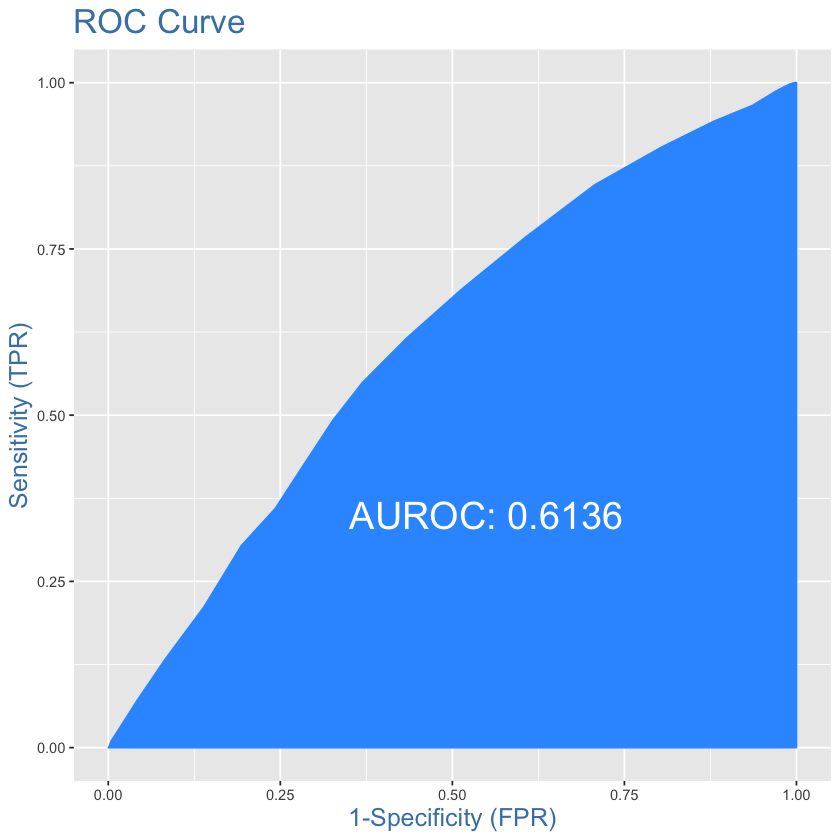

In [68]:
library(InformationValue)
plotROC(testData$readmit, predicted)